In [16]:
import pandas as pd
import numpy as np

# Load the dataset
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# No of rows and columns
print("Shape of the dataset:", diabetes_data.shape)

# column names
print("Column names:")
print(diabetes_data.columns)


# Display the first few rows of the dataset
print(diabetes_data.head())


Shape of the dataset: (100000, 9)
Column names:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [5]:
# Feature selection can be done based on correlation, importance, etc.
# For simplicity, let's use all features
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Perform one-hot encoding for all categorical variables
diabetes_data_encoded = pd.get_dummies(diabetes_data, drop_first=True)

# Reassign X and y
X = diabetes_data_encoded.drop('diabetes', axis=1)
y = diabetes_data_encoded['diabetes']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model with entropy criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Train Decision Tree model with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Continue with testing, evaluation, and visualization as before


DecisionTreeClassifier(random_state=42)

In [10]:
# Predictions
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Accuracy using Entropy:", accuracy_entropy)
print("Accuracy using Gini:", accuracy_gini)

# Classification Report
print("Classification Report using Entropy:")
print(classification_report(y_test, y_pred_entropy))

print("Classification Report using Gini:")
print(classification_report(y_test, y_pred_gini))


Accuracy using Entropy: 0.95255
Accuracy using Gini: 0.952
Classification Report using Entropy:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.75      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Classification Report using Gini:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



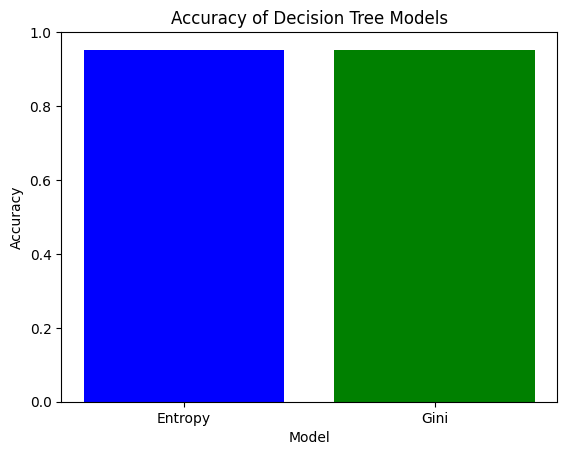

In [12]:
import matplotlib.pyplot as plt

# Accuracy of Decision Tree models
accuracies = [accuracy_entropy, accuracy_gini]
models = ['Entropy', 'Gini']

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree Models')
plt.ylim(0, 1)
plt.show()


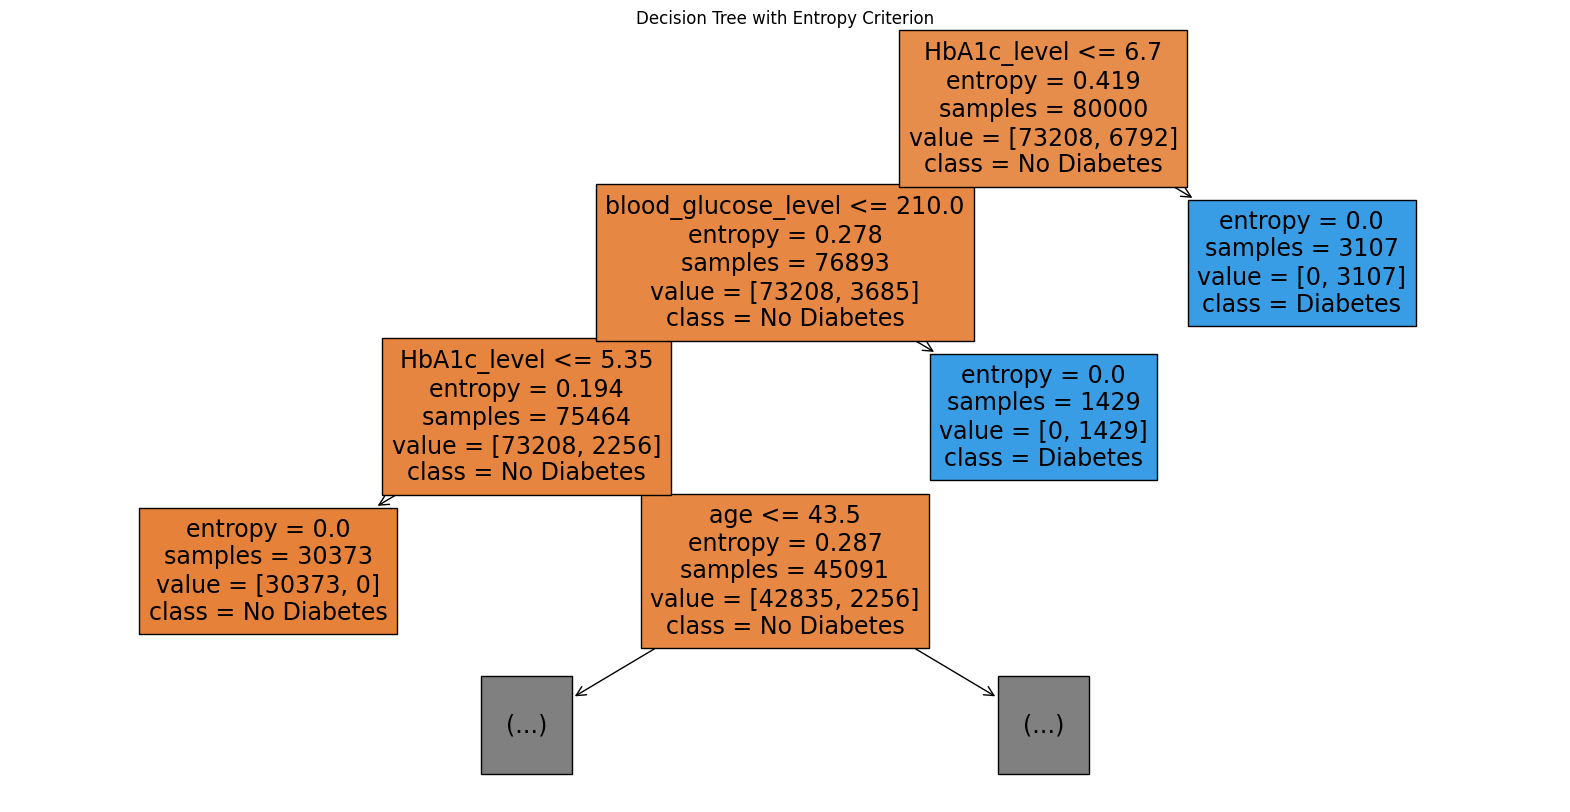

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(dt_model, criterion, X_columns, class_names, max_depth=None, save_fig=False):
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, feature_names=X_columns, class_names=class_names, filled=True, max_depth=max_depth)
    plt.title(f'Decision Tree with {criterion} Criterion')
    if save_fig:
        plt.savefig(f'decision_tree_{criterion.lower()}.png')
    else:
        plt.show()

# Plot Decision Tree with entropy criterion
plot_decision_tree(dt_entropy, 'Entropy', X.columns, ['No Diabetes', 'Diabetes'], max_depth=3, save_fig=True)




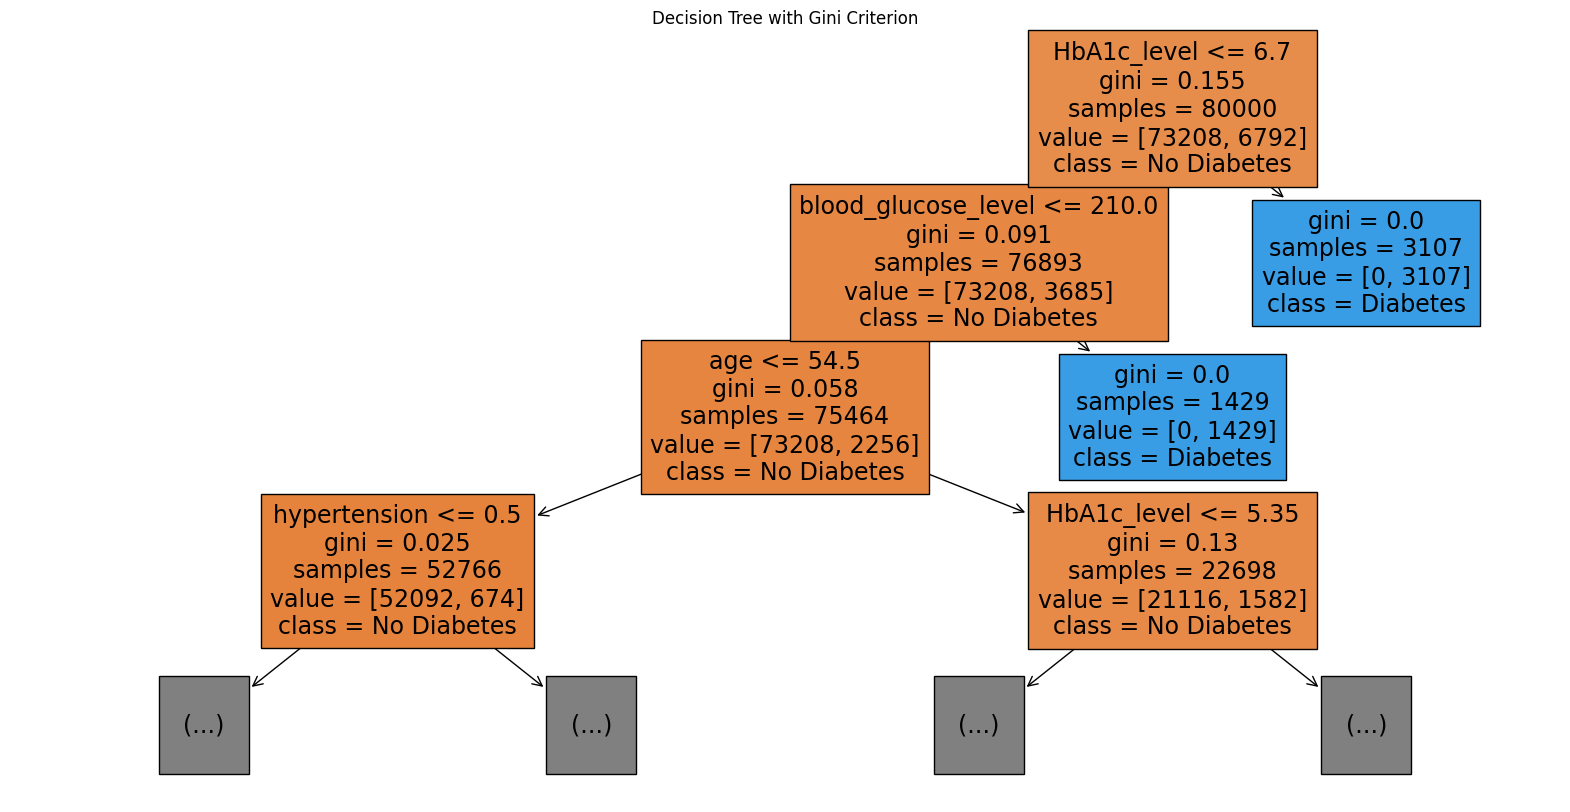

In [19]:
# Plot Decision Tree with gini criterion
plot_decision_tree(dt_gini, 'Gini', X.columns, ['No Diabetes', 'Diabetes'], max_depth=3, save_fig=True)